# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [ ]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
#preprocessed_email

In [ ]:
#len(preprocessed_email)

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

NameError: ignored

<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [ ]:
data.columns

In [ ]:
data.iloc[400]

### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [ ]:
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    return (list_of_preproessed_emails,subject,text)

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

 Performing the preprocessing of the data using Regex and NLTK
 

In [1]:
# loading the data from google drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/
%cd Colab\ Notebooks/cnn_documents
#!unrar e documents.rar
#!rm documents.rar

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks/cnn_documents


In [2]:
#Loading the files and performing the preprocessing of the data
import os
source = 'C:\\Users\\user\\Downloads\\document_cnn\\documents'
source = '/content/drive/My Drive/Colab Notebooks/cnn_documents'

label={}  ## contains unique labels
label_count={} ## Count of each labels
label_id=[] ## label ID 0 to 19. considered as y

if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        mylist=file.split('_')
        
        if mylist[0] in label_count :
            
            temp_val=label_count.get(mylist[0])
            temp_val+=1
            label_count.update( {mylist[0] : temp_val} )
            
        ##
            
            
            
            
        else:
            label_count[mylist[0]]=0
            label_number = len(label)
            label[mylist[0]]=label_number
            
        label_id.append(label.get(mylist[0]))
        
        if mylist[0] not in label :
            label_number+=1
           
## Count by classifiers             
print(label_count)
          

{'talk.politics.misc': 774, 'talk.religion.misc': 627, 'talk.politics.mideast': 939, 'talk.politics.guns': 909, 'soc.religion.christian': 996, 'sci.space': 986, 'sci.med': 989, 'sci.electronics': 980, 'sci.crypt': 990, 'rec.sport.hockey': 998, 'rec.sport.baseball': 993, 'rec.motorcycles': 993, 'rec.autos': 989, 'misc.forsale': 971, 'comp.windows.x': 979, 'comp.sys.mac.hardware': 960, 'comp.sys.ibm.pc.hardware': 981, 'comp.os.ms-windows.misc': 984, 'comp.graphics': 972, 'alt.atheism': 798}


In [3]:
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt 
df_label= DataFrame.from_dict(label_count,orient="index").reset_index()
df_label.columns=['Category','Count']
#df_label.reset_index()
df_label
#df_label.count()

,Category,Count
0,talk.politics.misc,774
1,talk.religion.misc,627
2,talk.politics.mideast,939
3,talk.politics.guns,909
4,soc.religion.christian,996
5,sci.space,986
6,sci.med,989
7,sci.electronics,980
8,sci.crypt,990
9,rec.sport.hockey,998


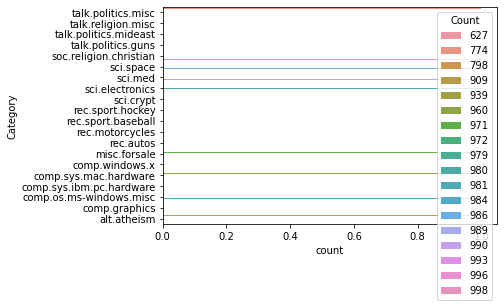

In [4]:
#df_label.head()

ax = sns.countplot(data=df_label,y="Category",hue="Count")
#p = sns.countplot(data=df_label, x = 'Class_type')
plt.show() 
sns.set(style="darkgrid")

#df_label.loc[df_label['Category'] == 'alt.atheism']

In [5]:
df_label.shape

(20, 2)

In [6]:


import nltk  
nltk.download('words')
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

def location_person(data_x):
    
    GPE_lst=[]
    person_lst=[]
    for sent in nltk.sent_tokenize(data_x):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                a=chunk.label()
                b=' '.join(c[0] for c in chunk)
                #print(a,b)
                
                if a=="GPE":
                    GPE_lst.append(b)
                elif a=="PERSON":
                    person_lst.append(b)
    
    return GPE_lst,person_lst

#String="i am living in the New York. My name is Nathan Richards. Jeff Pascal lives in Rohtang Pass."
#result1,result2=location_person(String)

## where result1 holds location
## Where result2 holds Person Name
#for stringsss in result2:
#    String=String.replace(stringsss," ")

#print(String)
 



[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [7]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
preprocessed_text=[]
preprocessed_email=[]
preprocessed_subject=[]
text=[]

import re
from tqdm import tqdm

##  source folder to read the files
source = 'C:\\Users\\user\\Downloads\\document_cnn\\documents'
source = '/content/drive/My Drive/Colab Notebooks/cnn_documents'
count=0
if os.path.isdir(source):
    data_files = os.listdir(source)
    for files in tqdm(data_files):
        
        temp=""
        total_text=""
        temp_sub=""

        f = open(os.path.join(source,files), "r",errors='ignore' )
        #encoding="utf8", errors='ignore'
        data=f.readlines()
        text.append(data)
        for data_x in data:
            
        #print(data)
        ## Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->
        ## [dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3"  
            pattern=re.compile(r'[a-zA-z0-9]+@[a-zA-z0-9]+\.[a-zA-z0-9.]+')
            
            #pattern=re.compile(r'([a-zA-z0-9]+)@([a-zA-z0-9]+).([a-zA-Z0-9]+)')
            #matches=pattern.finditer(data_x)
            matches=pattern.findall(data_x)
            #num = re.sub(r'([a-zA-z0-9]+)@([a-zA-z0-9]+).([a-zA-Z0-9]+)', "", data_x)
            #print(match.group())
            
            #preprocessed_subject.append(re.sub('[^a-zA-Z1-9\" \"]', '', match.group(3)))
            #data_x="email from kumr.shwetaketu@gmail.com Subject:jsdnfk:fksdjslkfjsld kfhnsdkjfhsfksfsdk "


            
            
            for match in matches:
                
                patternx=re.split("@",match)
                patternx=re.split("\.",patternx[1])
                to_exlude="com cOM COM Com"
                for dnss in patternx:
                    if dnss not in to_exlude:

                        if len(dnss)>2:
                            temp=temp+" "+dnss
                            
            data_x=re.sub('[a-zA-z0-9\._]+@[a-zA-z0-9]+\.[a-zA-z0-9.]+', ' ',data_x)
            
            ### finding the subject and removing it in the original text
            
            
            pattern=re.compile(r'(subject):(.+):(.+)',re.IGNORECASE)
            matches = pattern.search(data_x)           

            if matches:
                temp_sub+=re.sub('[^a-zA-Z1-9\" \"]', '', matches.group(3))
                data_x=re.sub(pattern, ' ',data_x)

            
            pattern=re.compile(r'(subject):(.+)',re.IGNORECASE)
            matches = pattern.search(data_x) 
            if matches:
                temp_sub+=re.sub('[^a-zA-Z1-9\" \"]', '', matches.group(2))
                data_x=re.sub(pattern, ' ',data_x)
 
            
            pattern=re.compile(r'(Write to):(.+)',re.IGNORECASE)
            data_x=re.sub(pattern, ' ',data_x)
            
            pattern=re.compile(r'(From):(.+)',re.IGNORECASE)
            data_x=re.sub(pattern, ' ',data_x)
     
        
            pattern=re.compile(r'<.+>',re.IGNORECASE)
            data_x=re.sub(pattern, ' ',data_x)
            
            pattern=re.compile(r'\(.+\)',re.IGNORECASE)
            data_x=re.sub(pattern, ' ',data_x)
           
            data_x=re.sub('\s+',' ',data_x)
            
            ## Removal of colons
            data_x=re.sub(r'([a-zA-Z\d])+:','',data_x)
            
            ## Decontraction
            data_x = re.sub(r"won't", "will not", data_x)
            data_x = re.sub(r"can\'t", "can not", data_x)
            data_x = re.sub(r"n\'t", " not", data_x)
            data_x = re.sub(r"\'re", " are", data_x)
            data_x = re.sub(r"\'s", " is", data_x)
            data_x = re.sub(r"\'d", " would", data_x)
            data_x = re.sub(r"\'ll", " will", data_x)
            data_x = re.sub(r"\'t", " not", data_x)
            data_x = re.sub(r"\'ve", " have", data_x)
            data_x = re.sub(r"\'m", " am", data_x)
           
            
            
            ## Chunking and removing the name
            result1, result2=location_person(data_x)
            for person_name in result2:
                data_x=data_x.replace(person_name," ")
            
            
            ##  replace all the numbers with spaces
            numbers = re.findall(r'[0–9]+', data_x)
            
            for number in numbers:
                data_x=data_x.replace(number," ")
    
            ## replace
        
            temp_var= re.findall('\S+:', data_x)
            for i in range(len(temp_var)):
                word=temp_var[i]
                if word in data_x:
                    data_x=data_x.replace(word," ")
    
            ##  replace all unwanted words with spaces
            
            data_x=re.sub(r'[^\w]', ' ', data_x)
            
            ## convert to lowe case
            
            for f in re.findall("([A-Z]+)", data_x):
                data_x = data_x.replace(f, f.lower())
            
            total_text=total_text+data_x
            
        preprocessed_email.append(temp)
        preprocessed_subject.append(temp_sub)
        
        #print(total_text)
         
        preprocessed_text.append(total_text)
        count+=1
        

100%|██████████| 18828/18828 [2:07:26<00:00,  2.46it/s]


In [9]:
nltk.download('maxent_ne_chunker')
preprocessed_email[0]
 

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


' thor isc titan ksc nasa gov ksc nasa gov cellar org cellar org thor ISC'

In [10]:
print(source)

/content/drive/My Drive/Colab Notebooks/cnn_documents


In [11]:
filename="preprocessed_email.txt"
f = open(os.path.join(source,filename), "w")
for contents in preprocessed_email:
    f.write(contents)
    f.write("\n")
f.close()

In [12]:
from pandas import DataFrame

 
templist=[text ,preprocessed_subject, preprocessed_email, preprocessed_text ]
df = DataFrame (templist).transpose()
df.columns = [ 'text','preprocessed_subject', 'preprocessed_email', 'preprocessed_text']
df.head()


,text,preprocessed_subject,preprocessed_email,preprocessed_text
0,[From: steveh@thor.isc-br.com (Steve Hendricks...,The earth also pollutes,thor isc titan ksc nasa gov ksc nasa gov cell...,in article rodger in article fur...
1,[From: eczcaw@mips.nott.ac.uk (A.Wainwright)\n...,New Study Out On Gay Percentage,mips nott optilink optilink mips nott,in article you might except tha...
2,"[From: hagenjd@wfu.edu (Jeff Hagen)\n, Subject...",Will Italy be the Next Domino to Fall,wfu edu dscomsa desy wfu edu,cross posted to alt politics italy and ta...
3,[From: hallam@dscomsa.desy.de (Phill Hallam-Ba...,WACO burning,dscomsa desy nwfocus halcyon apollo TEMPLE ED...,in article in article ...
4,"[From: paul@hsh.com (Paul Havemann)\n, Subject...",President to Nominate Carter for Nuclear Secu...,hsh life mit edu Campaign92 Org hsh,in article clinton the white house ...


text                    From: arc1@ukc.ac.uk (Tony Curtis)\r\r\r\nSubj...
class                                                         alt.atheism
preprocessed_text       said re is article if followed the quoting rig...
preprocessed_subject                                christian morality is
preprocessed_emails                                   ukc mac macalstr edu
Name: 567, dtype: object

In [13]:
df[395:415]

,text,preprocessed_subject,preprocessed_email,preprocessed_text
395,"[From: kcochran@nyx.cs.du.edu (Keith ""Justifie...",A KIND and LOVING God,nyx edu royalroads post RoyalRoads nyx edu,in article comments about how christi...
396,[From: turpin@cs.utexas.edu (Russell Turpin)\n...,Ancient references to Christianity,utexas edu news cso uiuc edu alexia lis uiuc edu,in article why is the nt tossed o...
397,"[From: jmeritt@mental.mitre.org\n, Subject: Ra...",Rawlins has been listening to the Devil,mental mitre org,god itself appeared to me and spoke to me ...
398,[From: eeb1@quads.uchicago.edu (E. Elizabeth B...,"What part of ""No"" dont you understand",quads uchicago edu advtech uswest advtech uswest,in article some people eve...
399,"[From: rjl+@pitt.edu (Richard J. Loether)\n, S...",Whos next Mormons and Jews,ctron vivaldi acc Virginia EDU,in article did not tell his disc...
400,"[From: jmeritt@mental.mitre.org\n, Subject: By...",By the sword,mental mitre org,deuteronmy 13 and when the lord thy god hat...
401,"[From: markp@elvis.wri.com (Mark Pundurs)\n, S...",After 2 years can we say that Christian Moral...,elvis wri ursa bear pooh bears blaze jhu edu ...,in in article in article th...
402,"[From: pharvey@quack.kfu.com (Paul Harvey)\n, ...",Ignorance is BLISS was Is it good that Jesus ...,quack kfu newton apple,in article ignorance is not bliss igno...
403,[From: sandvik@newton.apple.com (Kent Sandvik)...,A KIND and LOVING God,newton apple royalroads post RoyalRoads newto...,in article it is true what you stat...
404,[From: I3150101@dbstu1.rz.tu-bs.de (Benedikt R...,After 2 years can we say that Christian Moral...,dbstu1 elvis wri elvis wri,in article atoms are not objective th...


In [19]:
df['combined']= df['preprocessed_subject']+' '+df['preprocessed_email']+ ' '+df['preprocessed_text'].astype(str)
df2=df.drop(['text','preprocessed_subject', 'preprocessed_email', 'preprocessed_text'], axis=1)
df2.head()
print(label)

df2.to_csv('preprocessed.csv')


{'talk.politics.misc': 0, 'talk.religion.misc': 1, 'talk.politics.mideast': 2, 'talk.politics.guns': 3, 'soc.religion.christian': 4, 'sci.space': 5, 'sci.med': 6, 'sci.electronics': 7, 'sci.crypt': 8, 'rec.sport.hockey': 9, 'rec.sport.baseball': 10, 'rec.motorcycles': 11, 'rec.autos': 12, 'misc.forsale': 13, 'comp.windows.x': 14, 'comp.sys.mac.hardware': 15, 'comp.sys.ibm.pc.hardware': 16, 'comp.os.ms-windows.misc': 17, 'comp.graphics': 18, 'alt.atheism': 19}


In [20]:
print(label)
df2.head()


{'talk.politics.misc': 0, 'talk.religion.misc': 1, 'talk.politics.mideast': 2, 'talk.politics.guns': 3, 'soc.religion.christian': 4, 'sci.space': 5, 'sci.med': 6, 'sci.electronics': 7, 'sci.crypt': 8, 'rec.sport.hockey': 9, 'rec.sport.baseball': 10, 'rec.motorcycles': 11, 'rec.autos': 12, 'misc.forsale': 13, 'comp.windows.x': 14, 'comp.sys.mac.hardware': 15, 'comp.sys.ibm.pc.hardware': 16, 'comp.os.ms-windows.misc': 17, 'comp.graphics': 18, 'alt.atheism': 19}


,combined
0,The earth also pollutes thor isc titan ksc n...
1,New Study Out On Gay Percentage mips nott op...
2,Will Italy be the Next Domino to Fall wfu ed...
3,WACO burning dscomsa desy nwfocus halcyon ap...
4,President to Nominate Carter for Nuclear Secu...


Analyze your text data and pad the sequnce if required. 
Sequence length is not restricted, you can use anything of your choice. 


Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API,  

<h3> Model 1 </h3>
Text classification using CNN. word embedding 
Reference :  https://www.kaggle.com/au1206/text-classification-using-cnn

In [21]:
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/
%cd Colab\ Notebooks

## Loading the pre-processed file from google drive.
df2=pd.read_csv("preprocessed.csv")

X=df2['combined']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks


In [22]:
X[:10]

0     The earth also pollutes  thor isc titan ksc n...
1     New Study Out On Gay Percentage  mips nott op...
2     Will Italy be the Next Domino to Fall  wfu ed...
3     WACO burning  dscomsa desy nwfocus halcyon ap...
4     President to Nominate Carter for Nuclear Secu...
5     New Study Out On Gay Percentage  hopper Virgi...
6     Top Ten Tricks You Can Play on the American V...
7     email to the hill   merrimack edu    now  tha...
8     Good Neighbor Political Hypocrisy Test  pmafi...
9     NC vs Hunt Marine Gay Bashing in Wilmington N...
Name: combined, dtype: object

In [ ]:
categorical_labels[:10]

In [23]:
## Split the data into test and trains
## Split the data before Tokenizing to avoid data leakage

import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
import numpy as np
categorical_labels = to_categorical(np.asarray(label_id))

print(len(X))
print(len(categorical_labels))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, categorical_labels,
                                                    stratify=categorical_labels, 
                                                    test_size=0.25)

18828
18828


In [24]:
X_train.shape

(14121,)

In [25]:
categorical_labels[:3]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [26]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
max_length=2000

tokenizer  = Tokenizer(num_words = 12000)
tokenizer.fit_on_texts(X_train)
train_sequences =  tokenizer.texts_to_sequences(X_train)


x_train_text = sequence.pad_sequences(train_sequences, maxlen = max_length, padding='post')



word_index = tokenizer.word_index
print("unique words : {}".format(len(word_index)))

vocab_size=len(tokenizer.word_index) + 1



 

unique words : 99402


In [ ]:
x_train_text[:5]

In [28]:
print(vocab_size)


encoded_docs = tokenizer.texts_to_sequences(X_test)
x_test_text = sequence.pad_sequences(encoded_docs, maxlen = max_length, padding='post')
x_test_text.shape

99403


(4707, 2000)

In [29]:
x_test_text[:5]

array([[ 393,    3, 1641, ...,    0,    0,    0],
       [ 641, 2211,  367, ...,    0,    0,    0],
       [ 110,   67,  497, ...,    0,    0,    0],
       [1129,   13,  331, ...,    0,    0,    0],
       [2690, 8900,  686, ...,    0,    0,    0]], dtype=int32)

In [30]:
!pwd
#f = open(os.path.join("C:\\Users\\user\Downloads\\Glove", 'glove.6B.100d.txt'), encoding="utf8")
f = open('glove.6B.300d.txt', encoding="utf8")

embeddings_index = {}
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

/content/drive/My Drive/Colab Notebooks
Found 400000 word vectors.


In [ ]:
#embeddings_index

In [31]:
## choosing 100 Dimension due to resource constraints.
import numpy as np

print(vocab_size)
embedding_matrix = np.zeros((vocab_size, 300))
print(embedding_matrix.shape)
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

99403
(99403, 300)


In [32]:
from keras.layers import Embedding

print(len(word_index))
embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=2000,
                            trainable=False)

99402


In [33]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import tensorflow as tf


In [34]:
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score
 
class Metrics(Callback):
    
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.history={'loss': [],'acc': [],'val_loss': [],'val_acc': [], 'val_f1': [] }

 
    def on_epoch_end(self, epoch, logs={}):
        val_targ = self.validation_data[1]
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        #_val_f1=0
        #val_predict_hat=convert_to_binary(val_predict)
        val_predict_hat=val_predict
        _val_f1 = f1_score(val_targ, val_predict_hat,average='micro')
        
        self.history['loss'].append(logs.get('loss'))
        self.history['acc'].append(logs.get('acc'))
        ## displaying f1 score in the callbacks
        print(" f1 score:  ",_val_f1)
        if logs.get('[val_f1]', -1) != -1:
            self.history['val_f1'].append(_val_f1)
        if logs.get('val_loss', -1) != -1:
            self.history['val_loss'].append(logs.get('val_loss'))
        if logs.get('val_acc', -1) != -1:
            self.history['val_acc'].append(logs.get('val_acc'))

In [35]:
import datetime
from keras.callbacks import TensorBoard

from keras.callbacks import ModelCheckpoint

%load_ext tensorboard
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

metrics = Metrics(validation_data=(x_test_text, y_test))
 

In [39]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Lambda
import keras.backend as K

from keras.regularizers import l2

MAX_SEQUENCE_LENGTH=2000
embedding_dim=300
num_filters=512
filter_sizes = [3,4,5]

drop = 0.5
batch_size = 32
epochs = 10

inputs = Input(shape=(2000,))
embedding = embedding_layer(inputs)

print(embedding.shape)


#x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
## Reduced the filter sizes to avoid overfitting

conv_0 = Conv1D(64,7,activation='relu',kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(embedding)
conv_1 = Conv1D(64,7,activation='relu',kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(embedding)
conv_2 = Conv1D(64,7,activation='relu',kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(embedding)

#print(conv_0.shape)
#print(conv_1.shape)
#print(conv_2.shape)
concatenated_tensor = Concatenate(axis=1)([conv_0, conv_1, conv_2])


maxpool_0 = MaxPool1D(7)(concatenated_tensor)

print(maxpool_0.shape)
conv_3 = Conv1D(64, 7, activation='relu',kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001) )(maxpool_0)
conv_4 = Conv1D(64, 7, activation='relu', kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(maxpool_0)
conv_5 = Conv1D(64, 7, activation='relu', kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(maxpool_0)

concatenated_tensor2 = Concatenate(axis=1)([conv_3, conv_4, conv_5])


maxpool_1 = MaxPool1D(5)(concatenated_tensor2)

convx=Conv1D(64,5, kernel_initializer='normal', activation='relu',kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))(maxpool_1)

flatten = Flatten()(convx)
dropout = Dropout(drop)(flatten)
hidden1 = Dense(64, activation='relu')(dropout)
#dropout2 = Dropout(drop)(hidden1)
#hidden2 = Dense(256, activation='relu')(dropout2)
#dropout = Dropout(drop)(hidden2)
output = Dense(units=20, activation='softmax')(hidden1)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

checkpoint = ModelCheckpoint('weights_cnn_sentece.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

(None, 2000, 300)
(None, 854, 64)
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 2000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 2000, 300)    29820900    input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 1994, 64)     134464      embedding[1][0]                  
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 1994, 64)     134464      embedding[1][0]                  
_____________________________________________________

In [40]:
print("Traning Model...")
print(x_train_text.shape)
print(y_train.shape)
print(x_test_text.shape)
epochs=5
model.fit(x_train_text, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test_text, y_test),callbacks=[metrics,tensorboard_callback])
#model.fit(x_train_text, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test_text, y_test))

Traning Model...
(14121, 2000)
(14121, 20)
(4707, 2000)
Epoch 1/5
442/442 [==============================] - 36s 82ms/step - loss: 2.8223 - accuracy: 0.1433 - val_loss: 2.2114 - val_accuracy: 0.3064
Epoch 2/5
442/442 [==============================] - 36s 80ms/step - loss: 1.8006 - accuracy: 0.4450 - val_loss: 1.4866 - val_accuracy: 0.5539
Epoch 3/5
442/442 [==============================] - 36s 81ms/step - loss: 1.2641 - accuracy: 0.6216 - val_loss: 1.1667 - val_accuracy: 0.6690
Epoch 4/5
442/442 [==============================] - 36s 81ms/step - loss: 0.9632 - accuracy: 0.7281 - val_loss: 1.0457 - val_accuracy: 0.7017
Epoch 5/5
442/442 [==============================] - 36s 81ms/step - loss: 0.7721 - accuracy: 0.7883 - val_loss: 0.8776 - val_accuracy: 0.7604


In [ ]:
model.fit(x_train_text, y_train, batch_size=128, epochs=15, validation_data=(x_test_text, y_test),callbacks=[metrics,tensorboard_callback])


<h3> Model2 with charcnn </h3>



In [41]:
## reference https://towardsdatascience.com/character-level-cnn-with-keras-50391c3adf33
X=pd.read_csv("preprocessed.csv")

tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')

tk.fit_on_texts(X)


In [42]:
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

# Use char_dict to replace the tk.word_index
tk.word_index = char_dict.copy()
# Add 'UNK' to the vocabulary
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, categorical_labels,
                                                    stratify=categorical_labels, 
                                                    test_size=0.25)

In [44]:
#Convert string to index

train_sequences = tk.texts_to_sequences((X_train['combined']))

#print(train_sequences)
test_texts = tk.texts_to_sequences(X_test['combined'])

# Padding
train_data = pad_sequences(train_sequences, maxlen=3000, padding='post')
test_data = pad_sequences(test_texts, maxlen=3000, padding='post')


#print(train_data)
# Convert to numpy array
train_data = np.array(train_data)
test_data = np.array(test_data)

print(train_data.shape)
print(test_data.shape)

(14121, 3000)
(4707, 3000)


In [45]:
## Define Embedding layer
## choosing 100 Dimension due to resource constraints.

from keras.models import Model
from keras.layers import Input, Embedding, Conv1D, Activation, MaxPooling1D, Dense, Flatten, Dropout

input_size=3000
alphabet_size=70
embedding_size=128

#input_size = config['data']['input_size'] # 1014
#alphabet_size = config['data']['alphabet_size'] # 69
#embedding_size = config['model']['embedding_size'] # 128

embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [46]:
embedding_matrix.shape

(99403, 300)

In [47]:
## Create a model
input_size=3000
num_of_classes=20
from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model


input_size=3000
alphabet_size=70
embedding_size=128

#conv_layers=[[256,7,3],
#             [256,7,3],
#             [256,3,-1],
#              [256,3,-1],
#              [256,3,-1],
#             [256,3,3]]


conv_layers=[[256,7,3],
             [256,7,3]]
fully_connected_layers=[1024,1024] 
dropout_p=0.5
optimizer='adam'
loss='categorical_crossentropy'

# Input 
inputs = Input(shape=(input_size,), name='sent_input', dtype='int64')  # shape=(?, 3000)
# Embedding layer
conv = Embedding(alphabet_size+1, embedding_size, input_length=input_size)(inputs)

# Conv 
for filter_num, filter_size, pooling_size in conv_layers:
    conv = Conv1D(filter_num, filter_size)(conv) 
    
    if pooling_size != -1:
        conv = MaxPooling1D(pool_size=pooling_size,)(conv) # Final shape=(None, 34, 256)
x = Flatten()(conv) # (None, 8704)
print(x.shape)
print(type(x))
print(x)
# Fully connected layers 
for dense_size in fully_connected_layers:
    x = Dense(dense_size, activation='relu')(x) # dense_size == 1024
    x = Dropout(dropout_p)(x)
# Output Layer
predictions = Dense(num_of_classes, activation='softmax')(x)
# Build model
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy']) # Adam, categorical_crossentropy
model.summary()

(None, 84480)
<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("flatten_2/Reshape:0", shape=(None, 84480), dtype=float32)
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sent_input (InputLayer)      [(None, 3000)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 3000, 128)         9088      
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 2994, 256)         229632    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 998, 256)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 992, 256)          459008    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 330, 256)          0 

In [48]:
print("Traning Model...")
batch_size=128
epochs=3
print(train_data.shape, test_data.shape)
print(X_train[:2])
print(y_test)
print("=====")
model.fit(train_data , y_train, batch_size=batch_size, epochs=epochs, validation_data=(test_data, y_test))

Traning Model...
(14121, 3000) (4707, 3000)
       Unnamed: 0                                           combined
16776       16776   Challenge to Microsoft supporters  cicada occ...
11203       11203   Ultimate AWD vehicles  leland Stanford EDU en...
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====
Epoch 1/3
111/111 [==============================] - 36s 326ms/step - loss: 3.0319 - accuracy: 0.0734 - val_loss: 2.9258 - val_accuracy: 0.0718
Epoch 2/3
111/111 [==============================] - 36s 324ms/step - loss: 2.8204 - accuracy: 0.1050 - val_loss: 2.8288 - val_accuracy: 0.0888
Epoch 3/3
111/111 [==============================] - 36s 328ms/step - loss: 2.5664 - accuracy: 0.1737 - val_loss: 2.4408 - val_accuracy: 0.2110


In [49]:
score=model.evaluate(test_data, y_test)

148/148 [==============================] - 4s 28ms/step - loss: 2.4408 - accuracy: 0.2110


In [50]:
print("Validation accuracy = ",score[1])

Validation accuracy =  0.21096239984035492
